<h1>Part 04 : Machine Learning - KNN algorithm(K-Nearest Neighbour)</h1>
<h5>Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy.</h5>
<h7>The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. It is one of the popular and simplest classification and regression classifiers used in machine learning today.</h7>

<h2>Machine learning methods</h2>
<h2>Supervised learning:</h2>
<h7>It is defined by its use of labeled datasets to train algorithms to classify data or predict outcomes accurately.</h7>
<h2>Unsupervised learning:</h2>
<h7>It uses machine learning algorithms to analyze and cluster unlabeled datasets (subsets called clusters).</h7>
<h2>Semi-supervised learning:</h2>
<h7>It offers a happy medium between supervised and unsupervised learning. During training, it uses a smaller labeled data set to guide classification and feature extraction from a larger, unlabeled data set.</h7>
<h2>Self-supervised learning</h2>
<h2>Reinforcement learning:</h2>
<h7>It is a machine learning model that is similar to supervised learning, but the algorithm isn’t trained using sample data. This model learns as it goes by using trial and error. A sequence of successful outcomes will be reinforced to develop the best recommendation or policy for a given problem.</h7>

In [2]:
import pandas as pd
import numpy as np

In [3]:
dia = pd.read_csv('Diabetes.csv')
dia

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


In [4]:
dia = dia.rename(columns = {' Number of times pregnant' : 'num_times_preg',' Plasma glucose concentration' : 'plasma_gluc_conct', ' Diastolic blood pressure' : 'diast_blood_pres', ' Triceps skin fold thickness' : 'tric_skin_fold_thick', ' 2-Hour serum insulin' : '2h_serum_insul', ' Body mass index' : 'bmi',
                            ' Diabetes pedigree function' : 'diab_pedig_func', ' Age (years)' : 'age', ' Class variable' : 'output'})
dia

,num_times_preg,plasma_gluc_conct,diast_blood_pres,tric_skin_fold_thick,2h_serum_insul,bmi,diab_pedig_func,age,output
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


In [5]:
dia.output = dia.output.str.replace('YES', '1')
dia.output = dia.output.str.replace('NO', '0')

dia.output.unique()

array(['1', '0'], dtype=object)

<h2>Scikit-learn library</h2>
<h7>scikit-learn (also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.</h7>

<h2>sklearn.model_selection.train_test_split function</h2>
<h7>The train_test_split function of the sklearn.model_selection package in Python splits arrays or matrices into random subsets for train and test data, respectively.</h7>

<h2>sklearn.neighbors.KNeighborsClassifier</h2>
<h7>Classifier implementing the k-nearest neighbors vote.</h7>

<h2>sklearn.neighbors.KNeighborsRegressor</h2>
<h7>Regression based on k-nearest neighbors.</h7>

<h2>sklearn.metrics.classification_report</h2>
<h7>Build a text report showing the main classification metrics.</h7>

<h2>sklearn.metrics.confusion_matrix</h2>
<h7>Compute confusion matrix to evaluate the accuracy of a classification.</h7>

In [6]:
import matplotlib.pyplot as plt     # For Visualization
import sklearn     # Scikit-learn library for machine learning  
from sklearn.model_selection import train_test_split     # For Split dataset
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor     # For train
from sklearn.metrics import classification_report, confusion_matrix     # For Performance analysis

In [7]:
# Normalization
# dia.plasma_gluc_conct = dia.plasma_gluc_conct.apply(lambda x : (x - dia.plasma_gluc_conct.min()) / dia.plasma_gluc_conct.max())
# dia.bmi = dia.bmi.apply(lambda x : (x - dia.bmi.min()) / dia.bmi.max())
# dia.age = dia.age.apply(lambda x : (x - dia.age.min()) / dia.age.max())

In [8]:
dia.bmi.max()

67.1

In [9]:
x = dia[['plasma_gluc_conct', 'bmi', 'age']]     #     x is 'Input', 'Feature', 'independent variable', ...
print(type(x))
print(x.isna().sum())
print(x.shape)
print()

y = dia['output']     #    y is 'output', 'target', 'lable', 'dependent variable'
print(y.isna().sum())

<class 'pandas.core.frame.DataFrame'>
plasma_gluc_conct    0
bmi                  0
age                  0
dtype: int64
(768, 3)

0


In [10]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: output, Length: 768, dtype: object


In [14]:
# 1- Splitting data (80% for train and 20% for test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12121212, stratify = y) 
# 'random_state' is optional and it is for shuffle data....example: 323323, 23233, 12121212
# 'stratify' cause data lables balances on'y' (n_lable1 = n_lable2)
k = 21

# 2- Create model for train
knn = KNeighborsClassifier(metric = 'minkowski', n_neighbors = k)     # knn is a intelligence
# Distance Metrics ==> 'minkowski', 'manhattan', 'euclidean', 'cosine', 'jaccard', 'hamming'

# 3- send data to model 
knn.fit(x_train, y_train)   
# y_pred = knn.predict(x_test.values)
accuracy = knn.score(x_test, y_test) * 100
print("Accuracy in this model(knn): %.3f" % accuracy)

Accuracy in this model(knn): 82.468


<h2>Model Optimizing (Increase accuracy)</h2>
<h7>1- Increase data (records)</h7>
    
<h7>2- Change features (add or remove column(s))</h7>

<h7>3- Change hyper paramaeters in model (e: k, metric, ...)</h7>

In [16]:
# Select best 'K' with a loop and 'cross_val_score' package
from sklearn.model_selection import cross_val_score     # Evaluate a score by cross-validation
k_score = []
for k in range(3, 100, 2):
    knn = KNeighborsClassifier(n_neighbors = k, metric= 'minkowski')     # knn is a intelligence
    scores = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy')     #It averages.
    # x : the input features to train the model. y : the output labels associated with input features. cv : the number of folds (1 piece for test other pieces for train).
    k_score.append([k, scores.mean()])

k_score_max = max(k_score[i][1] for i in range(len(k_score)))
for i in range(len(k_score)):
    if k_score[i][1] == k_score_max:
        k_max = k_score[i][0]
        break
print("max_accuracy: %.2f" % (k_score_max * 100))
print("k_good:", k_max) 

max_accuracy: 76.70
k_good: 19


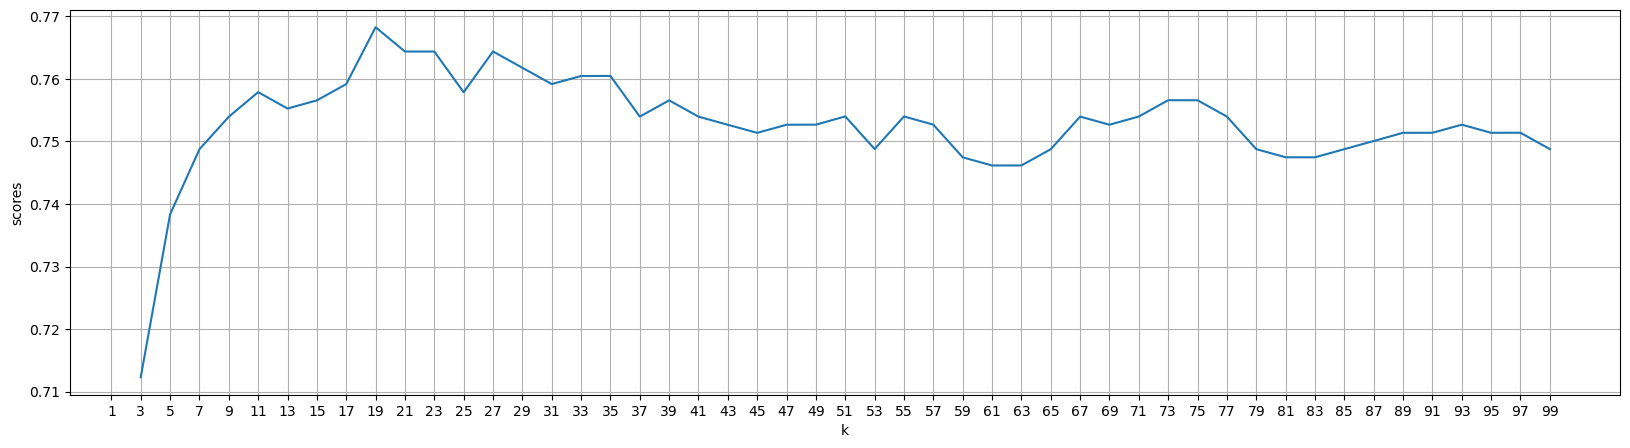

In [13]:
plt.figure(figsize=(20, 5))
plt.plot([k_score[i][0] for i in range(len(k_score))], [k_score[i][1] for i in range(len(k_score))])
plt.ylabel('scores')
plt.xlabel('k')
plt.xticks(range(1, 100, 2))
plt.grid()
plt.show()